In [0]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

In [2]:
#!pip install expectexception
import expectexception

# Algoritmos

Hemos aprendido un poco acerca de cómo programar en Python y algunas formas en las que podemos hacer que nuestro código sea más Pythonic. Sin embargo, la programación no solo consiste en hacer que la computadora funcione, sino en optimizar la cantidad de trabajo que la computadora necesita hacer. Podemos considerar varios tipos de trabajo, pero aquí consideraremos tres grandes cuellos de botella en el código:

1. _Complejidad comercial_: ¿cuántas instrucciones se ejecutan?
2. _Necesidades de memoria_: ¿cuánta memoria se necesita?
3. _I/O_: ¿Cuántas lecturas y escrituras o solicitudes de red debo realizar?

Un *Algoritmo* es un procedimiento para resolver un problema. Describe una secuencia de operaciones que, cuando se realizan, darán como resultado una solución a un problema. Hay muchos tipos de algoritmos, algunos están garantizados para encontrar una solución, otros no. A menudo nos interesa comprender el rendimiento de un algoritmo en términos de los tres cuellos de botella mencionados anteriormente (así como otros). Para analizar estos algoritmos, necesitamos desarrollar algunas herramientas para comprender cómo se comportan los algoritmos en función del tamaño del problema.

## Big O

Para cuantificar la complejidad de un algoritmo en particular, podemos considerar cómo crece el algoritmo con respecto al tamaño del problema. Para los propósitos de este cuaderno, solo consideraremos problemas que son unidimensionales, por lo que podemos cuantificar el algoritmo con respecto a un solo número, que indicaremos como $N$. Recuerde que un problema en sí no tiene una complejidad, sino que es la solución algorítmica que tiene complejidad. Por ejemplo, consideremos el problema de sumar todos los números entre 1 y $ N $. En la forma de sumar esto, podría ser tomar el número de todos estos números.

In [0]:
def sum_num(N):
    sum_ = 0
    for n in range(N):
        sum_ += n
    return sum_

Este algoritmo será $O(N)$ porque necesitamos realizar aproximadamente $N$ operaciones. Tenga en cuenta que solo nos importa la función dominante de $N$ en la expansión, por lo tanto, para nuestros propósitos $O(N) \approx O(N+1) \approx O(2N)$.

Sin embargo, si recordamos pensar un poco acerca de cómo se suman los números, podemos invocar una regla de suma que a menudo se atribuye a Gauss, que dice que


$$\sum_{n=1}^{N-1} n = \frac{N(N-1)}{2}$$

In [0]:
def sum_gauss(N):
    return int(N*(N-1)/2) # We can use integer division here, why?

Este algoritmo es $O(1)$ porque no depende de cómo el tamaño de $N$!. Vamos a comprobar que da la misma respuesta.

In [0]:
for N in range(100):
    assert sum_num(N) == sum_gauss(N)

Ahora vamos a trazar el tiempo que toma computar estas funciones como una función de $N$. Usaremos un paquete llamado `matplotlib` para hacer algunos trazados, no se preocupe, ¡lo aprenderemos más adelante!

Vamos a medir el tiempo que lleva realizar estos dos algoritmos. Vamos a tomar la media de varias carreras.

In [0]:
import matplotlib.pyplot as plt
import time

def compute(n_avgs, func, N):
    times = []
    for _ in range(n_avgs):
        ts = time.time()
        func(N)
        times.append(time.time() - ts)
    return sum(times)/float(len(times)) * 1000 # milliseconds

n_avgs = 100
time_sum = []
time_gauss = []
N_range = list(range(10,100000, 5000))
for N in N_range:
    time_sum.append(compute(n_avgs, sum_num, N))
    time_gauss.append(compute(n_avgs, sum_gauss, N))

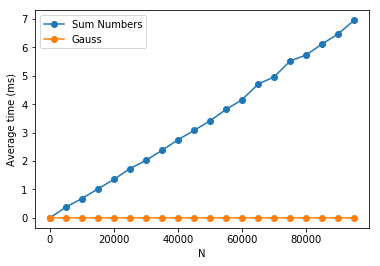

In [0]:
plt.plot(N_range, time_sum, 'o-', label='Sum Numbers')
plt.plot(N_range, time_gauss, 'o-', label='Gauss')
plt.xlabel('N')
plt.ylabel('Average time (ms)')
plt.legend()

## Complejidad computacional

Resolvamos una versión de un problema común que puede encontrar como científico de datos, ¿cómo debo almacenar mis datos? Tomemos un caso muy simple en el que nuestros datos son solo una lista de números y necesitamos almacenar esto en una lista. ¿Hay alguna forma de optimizar el almacenamiento?

Consideremos las ventajas y desventajas de varias cosas que podríamos hacer en la lista.

### Buscando un elemento

Si queremos encontrar un elemento en una lista y no sabemos nada sobre esa lista, entonces necesitamos revisar cada elemento de la lista para ver si ese elemento está ahí. Vamos a escribir una función para hacer esto.

In [0]:
def find_ele(list_, ele):
    for i in list_:
        if i == ele:
            return True
    return False

In order to test these, lets use the `random` module to generate a list of random numbers between $0$ and $10 *N$ where $N$ is the length of the list we want.

Para probar esto, usemos el módulo `random` para generar una lista de números aleatorios entre $0$ y $10 *N$ donde $N$ es la longitud de la lista que queremos.

In [0]:
import random
def random_list(N, sort=False):
    list_ = [random.randint(0, 10*N) for _ in range(N)]
    return sorted(list_) if sort else list_

In [0]:
random_list(5)

In [0]:
import numpy as np

def time_func(func, *args):
    ts = time.time()
    func(*args)
    return time.time() - ts

def compute_with_list(n_avgs, N, sort, *funcs):
    ans = []
    for _ in range(n_avgs):
        list_r = random_list(N, sort)
        n_to_find = random.randint(0, 10*N)
        ans.append([time_func(func, list_r, n_to_find)
                for func in funcs])
    # now find avg
    return np.array(ans).mean(axis=0)*1000
    

n_avgs = 40
N_range = list(range(10, 100000, 10000))
time_list = np.array([compute_with_list(n_avgs, N, False, find_ele) for N in N_range])

In [0]:
plt.plot(N_range, time_list, 'o-')

Tomemos un enfoque ligeramente diferente donde sabemos que esta lista se clasificó. Tenga en cuenta que la clasificación en sí misma tiene una complejidad de  $N\log(N)$, por lo que aunque podremos realizar búsquedas optimizadas en una lista ordenada, en general no es más rápido ordenar y buscar los elementos. Sin embargo, si sabemos que realizaremos búsquedas a menudo, podemos construir la lista como una estructura ordenada y por ahora podemos suponer que ya lo hemos hecho.

La optimización más básica que podemos realizar es verificar solo hasta que veamos un número mayor al que buscamos. Como sabemos que la lista está ordenada, tenemos la garantía de no encontrar el número en el resto de la lista.

In [0]:
def find_ele_sorted(list_, ele):
    for i in list_:
        if i == ele:
            return True
        if i > ele:
            return False
    return False

n_avgs = 40
N_range = list(range(10, 100000, 10000))
time_list = np.array([compute_with_list(n_avgs, N, True, find_ele, find_ele_sorted) for N in N_range])

In [0]:
plt.plot(N_range, time_list[:,0], 'o-', label='find_ele')
plt.plot(N_range, time_list[:,1], 'o-', label='find_ele_sorted')
plt.legend()

Esto funciona mejor en promedio, pero aún tiene el mismo tiempo de ejecución de $O(N)$. Tales optimizaciones son útiles, pero podemos hacerlo mejor. Permite implementar lo que a veces se conoce como búsqueda binaria. Este es un algoritmo recursivo que permite dividir la lista aproximadamente a la mitad en cada paso recursivo. Esto producirá un tiempo de ejecución asintótico logarítmico. Primero, ilustremos el algoritmo recorriendo un ejemplo donde `l_=[1,2,3,4,5,6,7,8,9,10,11]` y queremos comprobar si 2 está en la lista .

Primero verificamos el punto medio de la lista, que es 6. Sabemos que 2 no es igual a 6, pero como la lista está ordenada, podemos descartar inmediatamente la parte de la lista que contiene números mayores que 6. Por lo tanto, ya hemos descartado Fuera la mitad de los elementos de la lista.

Ahora podemos hacer que la pregunta sea 2 contenida en la lista `[1,2,3,4,5]`. Primero verificamos el elemento del punto medio de la lista, que es 3. Sabemos que 3 no es 2, pero nuevamente, desde $3>2$, podemos eliminar la mitad de la lista.

Ahora podemos verificar si 2 está en la lista `[1,2]`. Tomaremos el punto medio de esta lista como el primer elemento (ya que tiene un índice $1=len(lista)/2$), y esto es igual a 2. Por lo tanto, 2 está en la lista original.

Podemos ver que hemos realizado esta búsqueda en solo tres pasos y hasta un paso adicional, esto no dependía de dónde estaba 2 en la lista, solo que estaba ordenada. Ya que estamos eliminando la mitad de la lista cada vez, esperamos que la cantidad de pasos sea aproximadamente $log(N)$, donde se entiende que el logaritmo es la base 2. Vamos a hacer un gráfico de esta función en comparación con $N$.

In [0]:
x = np.linspace(10, 2000, 200)
plt.plot(x, np.log(x)/x)
plt.xlabel('N')
plt.ylabel(r'$\log(x)/x$')

## Memoización

¡A menudo podemos obtener un aumento en el rendimiento simplemente al no volver a calcular las cosas que ya hemos calculado! Veamos nuevamente nuestra secuencia recursiva de Fibonacci definida en un cuaderno anterior.

In [0]:
def fibonacci_recursive(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci_recursive(n-1)  + fibonacci_recursive(n-2)

Hagamos una versión ligeramente diferente que haga un seguimiento de cuántas veces llamamos a la función en cada elemento.

In [0]:
from collections import defaultdict
def fibonacci_count(n, d):
    d[n] += 1
    if n == 0:
        return 0, d
    elif n == 1:
        return 1, d
    else:
        n1, _ = fibonacci_count(n-1, d)
        n2, _ = fibonacci_count(n-2, d)
        return n1 + n2, d

Veamos esto en acción por $N=5$. 

In [0]:
N = 5
ans, d = fibonacci_count(N, defaultdict(int))
for i in range(N):
    print(i, d[i])


              5
          4       3
         3 2     2 1
       2 1 1 0  1 0
      1 0

Ahora veamos $N=25$.

In [0]:
N = 25
ans, d = fibonacci_count(N, defaultdict(int))
print(ans)
for i in range(N):
    print(i, d[i])

Observe que estamos llamando a algunas de estas funciones con el mismo argumento miles de veces. Si almacenamos la respuesta al problema en lugar de volver a calcularlo, ¿podemos hacerlo mejor?

In [0]:
def fibonacci_mem(n, d):
    if n in d:
        return d[n]
    elif n == 0:
        ans = 0
    elif n == 1:
        ans = 1
    else:
        ans = fibonacci_mem(n-1, d) + fibonacci_mem(n-2, d)
    d[n] = ans
    return ans

In [0]:
%%timeit
fibonacci_mem(33, {0:0,1:1})

In [0]:
%%timeit
fibonacci_recursive(33)

In [0]:
fibonacci_mem(33, {}) == fibonacci_recursive(33)

Nuestra solución memorizada funciona mucho mejor, es varios órdenes de magnitud más rápido que la solución recursiva.

Sin embargo, tiene un costo, aunque guardamos el cálculo, debemos usar más memoria para almacenar el resultado anterior. A menudo habrá una compensación entre los dos.

### Ejercicio

1. Escriba la función factorial $f(n) = n!$ Como una función recursiva.  
2. ¿La memorización haría esta función más rápida?  
3. Ahora, ¿qué pasaría si tuviéramos que calcular el factorial a menudo (quizás estuviéramos calculando probabilidades de diferentes selecciones), podríamos usar la memoria en este caso?  



## Memoria

Como se vio antes, la memoria tiene un compromiso en términos de memoria. Tratemos de describir eso aquí para el caso de la secuencia de Fibonacci. Tenemos que mantener un registro de un solo número de elemento (la solución calculada) para todos los números menores a $N$, el número que queremos calcular. Por lo tanto, la memoria que necesitamos crece con el tamaño del problema como $O(N)$.

Podemos analizar nuestros algoritmos en términos de memoria de una manera similar. Recuerda, es el algoritmo (y su implementación) el que tiene complejidad de memoria, no el problema en sí.

Para nuestro primer problema, nuevamente veremos la suma de los números entre 0 y  $N$, y tomaremos dos enfoques diferentes.

Para el primero construiremos una lista de estos elementos y luego los sumaremos.

In [0]:
def sum_list(n):
    numbers = list(range(n))
    return sum(numbers)

In [0]:
def sum_iter(n):
    number = 0
    sum_ = 0
    while number < n:
        sum_ += number
        number += 1
    return sum_

In [0]:
sum_list(100), sum_iter(100)

## Elija una estructura de datos sabiamente

Como hemos notado en la sección de clasificación, el tipo de estructura de datos que utilizamos a menudo está vinculado a nuestra elección de algoritmo. Por ejemplo, si aún no tenemos datos ordenados, es probable que no queramos usar la búsqueda binaria porque primero deberíamos ordenar los datos y luego anularíamos cualquier mejora en la búsqueda (la clasificación es peor que $O(N)$ ).

Esto se puede mitigar eligiendo sabiamente nuestra estructura original, especialmente cuando se construye a partir de datos sin procesar. Por ejemplo, al crear una lista, la inserción de elementos ordenados se puede hacer en $ O (log (N)) $ time (con casi lo mismo que la búsqueda binaria).

Otras estructuras de datos se prestan para otros propósitos algorítmicos. Por ejemplo, un `heap` (implementado en Python con la biblioteca [`heapq`](https://docs.python.org/2/library/heapq.html)) implementa una estructura en forma de árbol que es útil para las estadísticas de pedidos, como el seguimiento de los elementos de $ N $ más grandes o más pequeños de una colección. Puede leer más sobre esto [aquí](https://en.wikipedia.org/wiki/Binary_heap).

Incluso mientras trabajas en tus miniproyectos, a veces elegir un diccionario en lugar de una lista será la diferencia entre los minutos o segundos de cálculo.
